<a href="https://colab.research.google.com/github/ZahibVentura/Simulaci-n-2-/blob/main/Distribucion_exponencial_MH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def f(x,lam):
 return lam*np.exp(-lam*x)

In [13]:
lamda = 0.5
delta = 0.5

In [14]:
n = 100000
x = np.zeros(n)
x[0] = 2
acept = 0


for i in range(0,n-1):
  y = x[i]+np.random.uniform(-delta,delta)
  if y > 0:
    if np.random.rand() < min(1,f(y,lamda)/f(x[i],lamda)):
      x[i+1] = y
      acept += 1
    else:
      x[i+1] = x[i]
  else:
    x[i+1] = x[i]

In [15]:
print("La aceptacion fue del ",acept/n*100,"%")

La aceptacion fue del  88.208 %


In [17]:
print(np.mean(x))
print(np.std(x))

2.00605515392886
2.0767946417805234


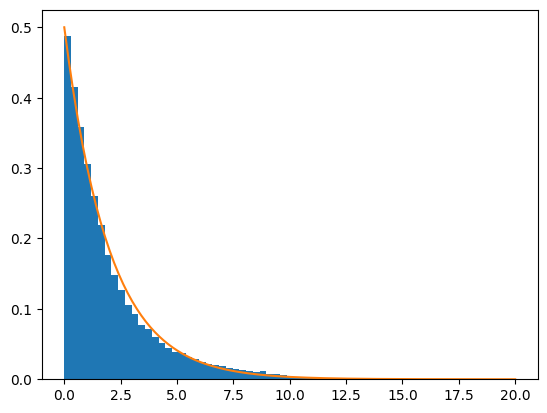

In [19]:
plt.hist(x,density=True,bins=50)
xs = np.linspace(0.0,20,200)
plt.plot(xs,f(xs,lamda))

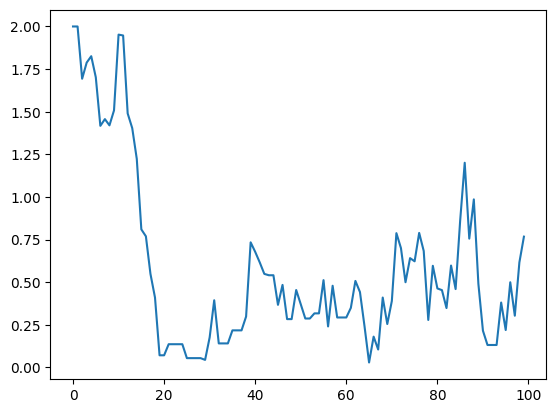

In [18]:
plt.plot(x[:100])